# eHorses

## Libraries and settings

In [146]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Get current working directory
print(os.getcwd())

/workspaces/arm_project


## Import data

In [147]:
## Read data
df = pd.read_csv("./data/eHorses_2.csv", sep=",")
df.head()

,web-scraper-order,web-scraper-start-url,Price_raw,City_raw,Discipline_raw,Title_raw,Description_raw
0,1733932050-1,https://www.ehorses.de/search?dum=dum&land=4?p...,"40,000 € bis 70,000 €",Sint-Martens-Lennik,Springen,NaN,"Holsteiner, Wallach, 7 Jahre, 169 cm, Schwarzb..."
1,1733932050-2,https://www.ehorses.de/search?dum=dum&land=4?p...,"15,000 €",Meerhout,Dressur,NaN,"Belgisches Warmblut, Stute, 5 Jahre, 174 cm, R..."
2,1733932050-3,https://www.ehorses.de/search?dum=dum&land=4?p...,"20,000 € bis 40,000 €",Pulheim,Dressur - Zucht - Springen - Freizeit\n ...,Vielversprechender gekörter Hengst von Fusionist,"Hannoveraner, Hengst, 4 Jahre, 168 cm, Brauner"
3,1733932050-4,https://www.ehorses.de/search?dum=dum&land=4?p...,"7,900 €",Pedralba,Dressur - Working Equitation - Barock - Vielse...,NaN,"PRE, Hengst, 3 Jahre, 165 cm, Apfelschimmel"
4,1733932050-5,https://www.ehorses.de/search?dum=dum&land=4?p...,"30,000 €",Coruche,Dressur - Schau - Barock - Zucht\n ...,NaN,"Lusitanos, Hengst, 4 Jahre, 161 cm, Schimmel"


## Create new variables

### Extract breed

In [148]:
# Extract breed from 'description_raw' strings
breed = []
for i in df['Description_raw']:
    d1 = i.split(',')[0].strip()
    breed.append(d1)

# Save as new variable in the pandas data frame
df['breed'] = pd.Series(breed, dtype="string")

# Print first 5 values
print(df['Description_raw'].head(5), '\n')
print(df['breed'].head(5))

0    Holsteiner, Wallach, 7 Jahre, 169 cm, Schwarzb...
1    Belgisches Warmblut, Stute, 5 Jahre, 174 cm, R...
2       Hannoveraner, Hengst, 4 Jahre, 168 cm, Brauner
3          PRE, Hengst, 3 Jahre, 165 cm, Apfelschimmel
4         Lusitanos, Hengst, 4 Jahre, 161 cm, Schimmel
Name: Description_raw, dtype: object 

0             Holsteiner
1    Belgisches Warmblut
2           Hannoveraner
3                    PRE
4              Lusitanos
Name: breed, dtype: string


### Extract sex

In [149]:
# Extract sex from 'description_raw' strings
sex = []
for i in df['Description_raw']:
    parts = i.split(',')
    if len(parts) > 1:
        sex.append(parts[1].strip())
    else:
        sex.append(None)

# Save as new variable in the pandas data frame
df['sex'] = pd.Series(sex, dtype="string")

# Print first 5 values
print(df['Description_raw'].head(5), '\n')
print(df['sex'].head(5))

0    Holsteiner, Wallach, 7 Jahre, 169 cm, Schwarzb...
1    Belgisches Warmblut, Stute, 5 Jahre, 174 cm, R...
2       Hannoveraner, Hengst, 4 Jahre, 168 cm, Brauner
3          PRE, Hengst, 3 Jahre, 165 cm, Apfelschimmel
4         Lusitanos, Hengst, 4 Jahre, 161 cm, Schimmel
Name: Description_raw, dtype: object 

0    Wallach
1      Stute
2     Hengst
3     Hengst
4     Hengst
Name: sex, dtype: string


### Extract age

In [150]:
# Extract age from 'Description_raw' strings
age = []
for i in df['Description_raw']:
    parts = i.split(',')
    if len(parts) > 2:
        age_parts = parts[2].strip().split()
        if age_parts:  # Check if age_parts is not empty
            age_str = age_parts[0]
            age.append(float(age_str))
        else:
            age.append(None)
    else:
        age.append(None)

# Save as new variable in the pandas data frame
df['age'] = pd.Series(age, dtype="float")

# Print first 5 values
print(df['Description_raw'].head(5), '\n')
print(df['age'].head(5))

0    Holsteiner, Wallach, 7 Jahre, 169 cm, Schwarzb...
1    Belgisches Warmblut, Stute, 5 Jahre, 174 cm, R...
2       Hannoveraner, Hengst, 4 Jahre, 168 cm, Brauner
3          PRE, Hengst, 3 Jahre, 165 cm, Apfelschimmel
4         Lusitanos, Hengst, 4 Jahre, 161 cm, Schimmel
Name: Description_raw, dtype: object 

0    7.0
1    5.0
2    4.0
3    3.0
4    4.0
Name: age, dtype: float64


### Extract height in cm

In [151]:
# Extract height from 'Description_raw' strings
height = []
for i in df['Description_raw']:
    parts = i.split(',')
    height_found = False
    for part in parts:
        match = re.search(r'(\d+)\s*cm', part.strip())
        if match:
            height.append(float(match.group(1)))
            height_found = True
            break
    if not height_found:
        height.append(None)

# Save as new variable in the pandas data frame
df['height'] = pd.Series(height, dtype="float")

# Print first 5 values
print(df['Description_raw'].head(5), '\n')
print(df['height'].head(5))

0    Holsteiner, Wallach, 7 Jahre, 169 cm, Schwarzb...
1    Belgisches Warmblut, Stute, 5 Jahre, 174 cm, R...
2       Hannoveraner, Hengst, 4 Jahre, 168 cm, Brauner
3          PRE, Hengst, 3 Jahre, 165 cm, Apfelschimmel
4         Lusitanos, Hengst, 4 Jahre, 161 cm, Schimmel
Name: Description_raw, dtype: object 

0    169.0
1    174.0
2    168.0
3    165.0
4    161.0
Name: height, dtype: float64


### Extract colour

In [152]:
# Extract colour from 'Description_raw' strings
colour = []
for i in df['Description_raw']:
    parts = i.split(',')
    if len(parts) > 4:
        colour.append(parts[4].strip())
    else:
        colour.append(None)

# Save as new variable in the pandas data frame
df['colour'] = pd.Series(colour, dtype="string")

# Print first 5 values
print(df['Description_raw'].head(5), '\n')
print(df['colour'].head(5))

0    Holsteiner, Wallach, 7 Jahre, 169 cm, Schwarzb...
1    Belgisches Warmblut, Stute, 5 Jahre, 174 cm, R...
2       Hannoveraner, Hengst, 4 Jahre, 168 cm, Brauner
3          PRE, Hengst, 3 Jahre, 165 cm, Apfelschimmel
4         Lusitanos, Hengst, 4 Jahre, 161 cm, Schimmel
Name: Description_raw, dtype: object 

0    Schwarzbrauner
1             Rappe
2           Brauner
3     Apfelschimmel
4          Schimmel
Name: colour, dtype: string


### Extract price

In [153]:
# Extract price from 'Price_raw' strings
price = []
for i in df['Price_raw']:
    matches = re.findall(r'\d{1,3}(?:,\d{3})*', i)
    if matches:
        prices = [int(price.replace(',', '')) for price in matches]
        if len(prices) == 1:
            price.append(float(prices[0]))
        elif len(prices) == 2:
            average_price = sum(prices) / 2
            price.append(float(average_price))
    else:
        price.append(None)

# Save as new variable in the pandas data frame
df['price'] = pd.Series(price, dtype="float")

# Print first 5 values
print(df['Price_raw'].head(5), '\n')
print(df['price'].head(5))

0    40,000 € bis 70,000 €
1                 15,000 €
2    20,000 € bis 40,000 €
3                  7,900 €
4                 30,000 €
Name: Price_raw, dtype: object 

0    55000.0
1    15000.0
2    30000.0
3     7900.0
4    30000.0
Name: price, dtype: float64


### Get data types of all variables including the new ones

In [154]:
df.dtypes

web-scraper-order                object
web-scraper-start-url            object
Price_raw                        object
City_raw                         object
Discipline_raw                   object
Title_raw                        object
Description_raw                  object
breed                    string[python]
sex                      string[python]
age                             float64
height                          float64
colour                   string[python]
price                           float64
dtype: object

## Count, identify and remove missing values

In [155]:
# Count missing values
print('Count missing values per variable')
print(pd.isna(df).sum(), '\n')

# Identify rows with missing values
print('Identify rows with missing values')
print(df.loc[df.isna().any(axis=1)][['breed', 'sex', 'age', 'height', 'price']], '\n')

# Drop rows where at least one element is missing, except for 'title_raw'
df2 = df.dropna(subset=[col for col in df.columns if col != 'title_raw'])
df2.head()

Count missing values per variable
web-scraper-order           0
web-scraper-start-url       0
Price_raw                   0
City_raw                    0
Discipline_raw              0
Title_raw                2230
Description_raw             0
breed                       0
sex                         0
age                       222
height                    668
colour                    668
price                    1457
dtype: int64 

Identify rows with missing values
                       breed      sex   age  height    price
0                 Holsteiner  Wallach   7.0   169.0  55000.0
1        Belgisches Warmblut    Stute   5.0   174.0  15000.0
3                        PRE   Hengst   3.0   165.0   7900.0
4                  Lusitanos   Hengst   4.0   161.0  30000.0
5            Sonstige Rassen    Stute  12.0   163.0   3450.0
...                      ...      ...   ...     ...      ...
8905                     PRE   Hengst   3.0   165.0   7900.0
8906               Lusitanos   Hengst  

,web-scraper-order,web-scraper-start-url,Price_raw,City_raw,Discipline_raw,Title_raw,Description_raw,breed,sex,age,height,colour,price
2,1733932050-3,https://www.ehorses.de/search?dum=dum&land=4?p...,"20,000 € bis 40,000 €",Pulheim,Dressur - Zucht - Springen - Freizeit\n ...,Vielversprechender gekörter Hengst von Fusionist,"Hannoveraner, Hengst, 4 Jahre, 168 cm, Brauner",Hannoveraner,Hengst,4.0,168.0,Brauner,30000.0
6,1733932050-7,https://www.ehorses.de/search?dum=dum&land=4?p...,"20,000 € bis 40,000 €",Lissabon,Dressur - Working Equitation - Zucht\n ...,Grossrahmiger Lusitano mit sehr viel Potential,"Lusitanos, Hengst, 3 Jahre, 168 cm, Brauner",Lusitanos,Hengst,3.0,168.0,Brauner,30000.0
7,1733932050-8,https://www.ehorses.de/search?dum=dum&land=4?p...,"10,000 € bis 15,000 €",Cegléd,Dressur,Weihnachten Aktion,"Hannoveraner, Wallach, 8 Jahre, 167 cm, Brauner",Hannoveraner,Wallach,8.0,167.0,Brauner,12500.0
8,1733932050-9,https://www.ehorses.de/search?dum=dum&land=4?p...,"15,000 € bis 20,000 €",Cegléd,Springen - Hunter - Dressur,Verkauf eines außergewöhnlichen Sportpferdes,"Deutsches Sportpferd, Wallach, 8 Jahre, 168 cm...",Deutsches Sportpferd,Wallach,8.0,168.0,Schimmel,17500.0
9,1733932050-10,https://www.ehorses.de/search?dum=dum&land=4?p...,"10,000 € bis 15,000 €",Cegléd,Dressur,Toll Dressur wallach,"KWPN, Wallach, 6 Jahre, 172 cm, Rappe",KWPN,Wallach,6.0,172.0,Rappe,12500.0


In [156]:
# Count missing values
#print('Count missing values per variable')
#print(pd.isna(df).sum(), '\n')

# Identify rows with missing values
#print('Identify rows with missing values')
#print(df.loc[df.isna().any(axis=1)][['breed', 'sex', 'age', 'height', 'colour', 'price']], '\n')

# Drop rows where at least one element is missing.
#df2 = df.dropna()
#df2.head()

## Count, identify & remove duplicated values

In [157]:
# Count duplicated values in the 'Description_raw' column
print('Sum of duplicated Description_raw values:', df['Description_raw'].duplicated().sum(), '\n')

# Identify duplicated values in the 'Description_raw' column
print('Duplicated values')
print(df.loc[df['Description_raw'].duplicated(keep='last')])

# Drop rows with duplicated 'Description_raw' values
df3 = df.drop_duplicates(subset=['Description_raw'])

# Print the shape of the dataframe to confirm the duplicates are removed
print(df3.shape)

# Display the first few rows of the dataframe
df3.head()

Sum of duplicated Description_raw values: 8898 

Duplicated values
     web-scraper-order                              web-scraper-start-url  \
0         1733932050-1  https://www.ehorses.de/search?dum=dum&land=4?p...   
1         1733932050-2  https://www.ehorses.de/search?dum=dum&land=4?p...   
2         1733932050-3  https://www.ehorses.de/search?dum=dum&land=4?p...   
3         1733932050-4  https://www.ehorses.de/search?dum=dum&land=4?p...   
4         1733932050-5  https://www.ehorses.de/search?dum=dum&land=4?p...   
...                ...                                                ...   
8895   1733933163-8896  https://www.ehorses.de/search?dum=dum&land=4?pn=2   
8896   1733933163-8897  https://www.ehorses.de/search?dum=dum&land=4?pn=2   
8897   1733933163-8898  https://www.ehorses.de/search?dum=dum&land=4?pn=2   
8898   1733933163-8899  https://www.ehorses.de/search?dum=dum&land=4?pn=2   
8899   1733933163-8900  https://www.ehorses.de/search?dum=dum&land=4?pn=2   

        

,web-scraper-order,web-scraper-start-url,Price_raw,City_raw,Discipline_raw,Title_raw,Description_raw,breed,sex,age,height,colour,price
0,1733932050-1,https://www.ehorses.de/search?dum=dum&land=4?p...,"40,000 € bis 70,000 €",Sint-Martens-Lennik,Springen,NaN,"Holsteiner, Wallach, 7 Jahre, 169 cm, Schwarzb...",Holsteiner,Wallach,7.0,169.0,Schwarzbrauner,55000.0
1,1733932050-2,https://www.ehorses.de/search?dum=dum&land=4?p...,"15,000 €",Meerhout,Dressur,NaN,"Belgisches Warmblut, Stute, 5 Jahre, 174 cm, R...",Belgisches Warmblut,Stute,5.0,174.0,Rappe,15000.0
2,1733932050-3,https://www.ehorses.de/search?dum=dum&land=4?p...,"20,000 € bis 40,000 €",Pulheim,Dressur - Zucht - Springen - Freizeit\n ...,Vielversprechender gekörter Hengst von Fusionist,"Hannoveraner, Hengst, 4 Jahre, 168 cm, Brauner",Hannoveraner,Hengst,4.0,168.0,Brauner,30000.0
3,1733932050-4,https://www.ehorses.de/search?dum=dum&land=4?p...,"7,900 €",Pedralba,Dressur - Working Equitation - Barock - Vielse...,NaN,"PRE, Hengst, 3 Jahre, 165 cm, Apfelschimmel",PRE,Hengst,3.0,165.0,Apfelschimmel,7900.0
4,1733932050-5,https://www.ehorses.de/search?dum=dum&land=4?p...,"30,000 €",Coruche,Dressur - Schau - Barock - Zucht\n ...,NaN,"Lusitanos, Hengst, 4 Jahre, 161 cm, Schimmel",Lusitanos,Hengst,4.0,161.0,Schimmel,30000.0


### Save data to file

In [158]:
df3.to_csv('./data/eHorses_2_prepared.csv', 
           sep=",", 
           encoding='utf-8', 
           index=False)

# Exploratory data analysis (EDA) of apartments data

## Create sqlite data base

In [159]:
# Create data base
conn = sqlite3.connect('./data/eHorses_2_prepared.db') 

# Create cursor object to execute SQL commands
cursor = conn.cursor()

# Show dbs in the directory
flist = fnmatch.filter(os.listdir('.'), '*.db')
for i in flist:
    print(i)

## Create SQL-table in the database

In [160]:
cursor.execute('''CREATE TABLE IF NOT EXISTS horses_table (
                    OrderId VARCHAR(50),
                    StartUrl VARCHAR(200),
                    PriceRaw VARCHAR(50),
                    City VARCHAR(100),
                    Discipline VARCHAR(200),
                    Title VARCHAR(200),
                    Description VARCHAR(500),
                    Breed VARCHAR(100),
                    Sex VARCHAR(50),
                    Age DECIMAL(8,2),
                    Height DECIMAL(8,2),
                    Colour VARCHAR(50),
                    Price DECIMAL(8,2))''')

# Confirm changes to the table
conn.commit()

## Read data from file to data frame

In [161]:
df = pd.read_csv('./data/eHorses_2_prepared.csv', 
                 sep=',', 
                 encoding='utf-8')[['web-scraper-order', 'City_raw', 'breed', 'sex', 'age', 'height', 'colour', 'price']]
print(df.shape)
df.head(25)

(22, 8)


,web-scraper-order,City_raw,breed,sex,age,height,colour,price
0,1733932050-1,Sint-Martens-Lennik,Holsteiner,Wallach,7.0,169.0,Schwarzbrauner,55000.0
1,1733932050-2,Meerhout,Belgisches Warmblut,Stute,5.0,174.0,Rappe,15000.0
2,1733932050-3,Pulheim,Hannoveraner,Hengst,4.0,168.0,Brauner,30000.0
3,1733932050-4,Pedralba,PRE,Hengst,3.0,165.0,Apfelschimmel,7900.0
4,1733932050-5,Coruche,Lusitanos,Hengst,4.0,161.0,Schimmel,30000.0
5,1733932050-6,Achtmaal,Sonstige Rassen,Stute,12.0,163.0,Fuchs,3450.0
6,1733932050-7,Lissabon,Lusitanos,Hengst,3.0,168.0,Brauner,30000.0
7,1733932050-8,Cegléd,Hannoveraner,Wallach,8.0,167.0,Brauner,12500.0
8,1733932050-9,Cegléd,Deutsches Sportpferd,Wallach,8.0,168.0,Schimmel,17500.0
9,1733932050-10,Cegléd,KWPN,Wallach,6.0,172.0,Rappe,12500.0


## Plot histogramm of horse prices

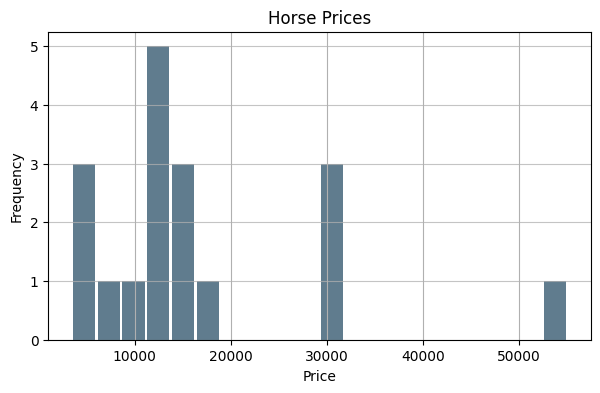

In [162]:
# Create a histogram
plt.figure(figsize=(7,4))
df['price'].plot.hist(grid=True, 
                      bins=20, 
                      rwidth=0.9,
                      color='#607c8e')
plt.title('Horse Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [163]:
most_expensive_horse = df['price'].max()
print(f'The most expensive horse costs: {most_expensive_horse} EUR')

The most expensive horse costs: 55000.0 EUR


### Encoding of categorical variables

In [164]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [165]:
# Get the label encoder for the 'sex' column
le_sex = label_encoders['sex']

# Create a mapping of encoded values to original categories
sex_mapping = dict(zip(le_sex.transform(le_sex.classes_), le_sex.classes_))

# Print the mapping
print(sex_mapping)

{np.int64(0): 'Hengst', np.int64(1): 'Stute', np.int64(2): 'Wallach'}


## Random Forest Regression

### Create train and test samples for the random forest (train = 80%, test = 20% of the data)

In [166]:
from sklearn.model_selection import train_test_split

# Create train and test samples
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['sex', 'breed', 'height', 'age']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
    sex  breed  height   age
5     1     10   163.0  12.0
20    1      3   165.0   3.0
11    1      3   168.0   4.0
3     0      9   165.0   3.0
4     0      7   161.0   4.0 

y2_train:
5      3450.0
20    16000.0
11    12500.0
3      7900.0
4     30000.0
Name: price, dtype: float64


### Fit the Random Forest Regression

In [167]:
# Initialize the Random Forest Regressor
reg_rf = RandomForestRegressor(n_estimators=500, 
                               max_depth=10, 
                               random_state=5)

# Fit the model
reg_rf.fit(X2_train, y2_train)

# Calculate coefficient of determination (R-squared)
r_squared = reg_rf.score(X2_test, y2_test)
print('R-squared:', round(r_squared, 4))

ValueError: Input y contains NaN.

### Show feature importance

Index(['sex', 'age', 'breed', 'height'], dtype='object')
[0.59669373 0.37577157 0.02522102 0.00231368]


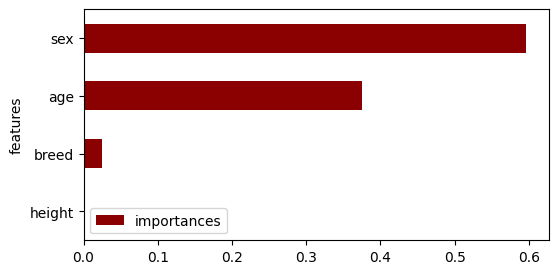

In [117]:
# Derive feature importance from random forest
cols = X2_train.columns
importances = reg_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in reg_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print col-names and importances-values
print(cols[indices])
print(importances[indices])

# Barplot with feature importance
df_fi = pd.DataFrame({'features': cols, 'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6, 3))

plt.show()

### Fit the multiple regression model (yes, the output is rich :-), but we need only part of it for interpretation!)

In [118]:
import statsmodels.api as sm

# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y2_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     4565.
Date:                Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:14:23   Log-Likelihood:                -39989.
No. Observations:                4186   AIC:                         7.999e+04
Df Residuals:                    4181   BIC:                         8.002e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.147e+04   1075.048     38.578      0.0

### Plot regression line

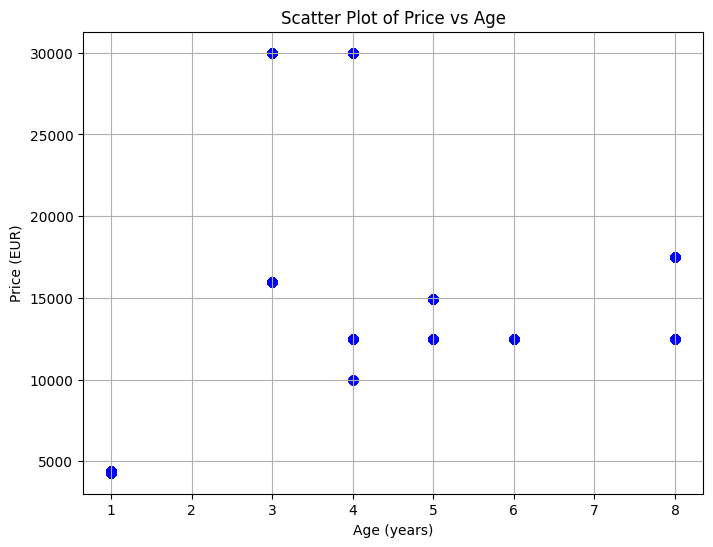

In [119]:
# Scatter plot for price as it changes according to age
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['price'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Price vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Price (EUR)')
plt.grid(True)
plt.show()

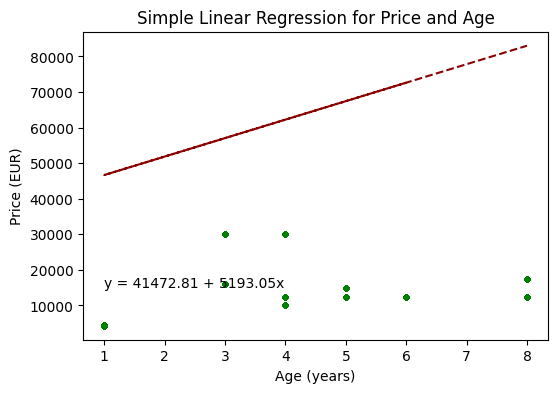

In [120]:
# Function to calculate model predictions
def myfunc(x):
    return olsres.params['const'] + olsres.params['age'] * x

# Apply myfunc() to age, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X2_train['age']))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X2_train['age'], y2_train, s=10, color='green')
plt.plot(X2_train['age'], mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression for Price and Age')
plt.xlabel('Age (years)')
plt.ylabel('Price (EUR)')

# Add regression equation
plt.text(1, 
         15000, 
         f"y = {olsres.params['const']:.2f} + {olsres.params['age']:.2f}x", 
         color='black', 
         fontsize=10)

plt.show()

### Check model residuals (residuals = observed prices minus predicted prices)

In [121]:
# Predict the prices for the train data
y2_train_pred = reg_rf.predict(X2_train)

# Calculate model residuals for train data
residuals = y2_train - y2_train_pred

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {y2_train_pred[0]:.2f}')
print(f'1st Observed price in dataset: {y2_train.iloc[0]:.2f}')
print(f'1st Residual price in dataset: {residuals.iloc[0]:.2f}')

1st Predicted price in dataset: 12500.00
1st Observed price in dataset: 12500.00
1st Residual price in dataset: 0.00


### Plot histogram of residuals

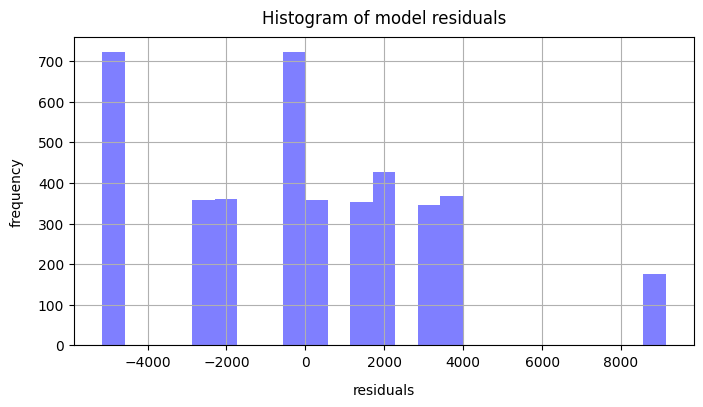

In [122]:
# Plot histogram of residuals
fig = plt.figure(figsize=(8, 4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=25, 
                            color='blue', 
                            alpha=0.5)

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)
plt.grid()
plt.show()